# Implementation student performance with linear regression algorithm

In [56]:
import numpy as np                # Library untuk komputasi python 
import pandas as pd               # Library untuk ETL Python 
import matplotlib.pyplot as plt   # Library untuk visualisasi data python 
import seaborn as sns             # Library untuk visualisasi data python 
from scipy.stats import norm      # Library untuk statistika python 
from sklearn import linear_model  # Library untuk model Regresi Linier 
from sklearn.model_selection import train_test_split # library untuk membagi data training dan testing
from sklearn import metrics       # Library untuk pengukuran kinerja model 
from sklearn.preprocessing import LabelEncoder # Library untuk encoder data kategorik
import statsmodels.api as sm
import joblib

%matplotlib inline 
sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.set_theme(style="white", palette=None)
plt.style.use('bmh')

## Load and Information Datasheet

In [2]:
# Load datasheet dan tampilkan 5 data teratas dan terakhir 
data_siswa = pd.read_csv("datasheet/StudentsPerformance.csv")
data_siswa.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# tampilkan 5 data terkahir 
data_siswa.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<ul>
    <li><h3>Insight</h3></li>
    <p> terlihat bahwa 5 data teratas dan terakhir pada datasheet yang kita gunakan memiliki fitur yang beragam</p>
    <p> pada tahap ini mempelajari informasi yang ada pada datasheet sebelum diproses lebih lanjut</p>
<ul/>

In [4]:
# proporsi jumlah data dan baris pada datasheet 
print("Proporsi jumlah data dan baris pada datasheet : ", data_siswa.shape)
print("Proporsi jumlah baris pada datasheet : ", data_siswa.shape[0], "baris")
print("Proporsi jumlah kolom pada datasheet : ", data_siswa.shape[1], "kolom")
# tampilkan informasi pada datasheet 
print(data_siswa.info())

Proporsi jumlah data dan baris pada datasheet :  (1000, 8)
Proporsi jumlah baris pada datasheet :  1000 baris
Proporsi jumlah kolom pada datasheet :  8 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


<ul>
    <li>
        <h3>Insight</h3>
        <p>proporsi data yang digunakan sebesar (1000, 8)</p>
        <p>jumlah baris pada data sebanyak 1000 baris</p>
        <p>jumlah kolom pada data sebanyak 8 kolom</p>
    </li>
    <p>dari infomasi yang didapat pada data memliki tipe data object dan int64 dan tidak terdapat nilai null</p>
</ul>

# Exploratory data analysis (EDA)

## Data Preparation

In [5]:
# mengecek kolom yang bernilai kosong 
data_siswa[data_siswa.isna().all(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<ul>
    <li><h3> Insight </h3></li>
    <p>terlihat bahwa datasheet yang kita gunakan tidak memiliki nilai yang missing value sehingga dapat dilanjutkan ke tahap berikut nya</p>
</ul>

### merubah nama fitur pada datasheet 

<p>sebelum dilakukan preprocessing data kita perlu merubah nama tabel agar dapat memudahkan kita memahami data</p>

In [6]:
# ubah nama setiap kolom pada datasheet 
data_siswa = data_siswa.rename(columns={"gender":"jenis kelamin","race/ethnicity":"kelompok",
                                        "parental level of education":"tingkat pendidikan", "lunch":"level",
                                        "test preparation course":"persiapan tes","math score":"nilai matematika",
                                        "reading score":"nilai membaca","writing score":"nilai menulis"})
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Analisis Statistik 

In [7]:
# ringkasan analisis statistik 
data_siswa.describe().T

,count,mean,std,min,25%,50%,75%,max
nilai matematika,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
nilai membaca,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
nilai menulis,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p>dari analisis statistika deskriptif tersebut : </p>
    <p> 
        1.) jumlah data pada kolom nilai matematika sampai dengan 
            kolom nilai menulis memiliki jumlah data yang sama sebanyak 1000 data
    </p>
    <p> 
        2.) nilai mean pada setiap kolom tidak terlalu jauh dikisaran angka 66 sampai dengan 68
    </p>
    <p> 
        3.) dari ketiga kolom tersebut memiliki nilai minimal yang jauh antar datanya sehingga
            menghasilkan nilai outliers pada data
    </p>
</ul> 

### Distribusi Normal pada fitur datasheet 

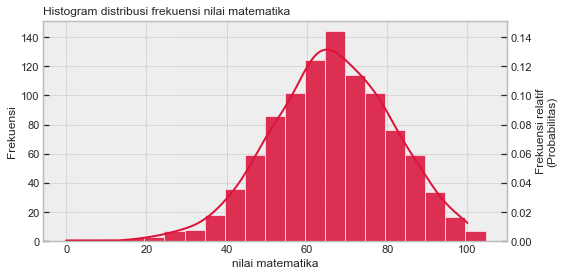

In [8]:
# histogram visualization skor matematika 
fig, ax = plt.subplots(figsize=(8,4))

# histogram untuk frekuensi data skor matematika 
sns.histplot(data_siswa['nilai matematika'], binwidth=5,  # atur jarak antar histogram 
             binrange=(data_siswa['nilai matematika'].min() - 0.5,  # nilai data minimal
                       data_siswa['nilai matematika'].max() + 0.5), # nilai data maksimal 
             ec="w", color = "crimson", ax=ax) 

# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()

# buat plot histogram untuk komulatif 
sns.histplot(data_siswa['nilai matematika'], stat="probability", binwidth=5,  # atur jarak antar histogram 
             binrange=(data_siswa['nilai matematika'].min() - 0.5,   # nilai data minimal
                       data_siswa['nilai matematika'].max() + 0.5),  # nilai data maksimal
             kde=True ,ec="w", color="crimson", ax=ax1)

# buat sumbu x plot 1 untuk label nilai matematika dengan fontsize sebesar 12
ax.set_xlabel("nilai matematika", fontsize=12)
# buat sumbu y plot 1 untuk label untuk frekuensi data 
ax.set_ylabel("Frekuensi", fontsize=12)
# buat sumbu y plot 2 frekuensi relatif 
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
# buat grid untuk plot sumbu y
ax1.grid(axis="y")
# tampilkan hasil visualisasi
plt.title("Histogram distribusi frekuensi nilai matematika", fontsize=12, loc='left')
plt.tight_layout()
plt.show()

In [9]:
# statistik deskriptif dari nilai matematika 
print("jumlah rata - rata nilai matematika : ", data_siswa['nilai matematika'].mean())
print("nilai tengah dari nilai matematika  : ", data_siswa['nilai matematika'].median())
print("nilai yang paling sering muncul     : ", data_siswa['nilai matematika'].mode())

jumlah rata - rata nilai matematika :  66.089
nilai tengah dari nilai matematika  :  66.0
nilai yang paling sering muncul     :  0    65
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
       dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada ujian matematika sebesar    
       66.089 
    </p>
    <p>
       nilai tengah dari keselurahan data pada kolom nilai matematika sebesar 66.0
    </p>
    <p>
        nilai yang sering muncul pada ujian matematika banyak siswa yang mendapat nilai 0 dan 65 dari keseluruhan data
    </p>
<ul>

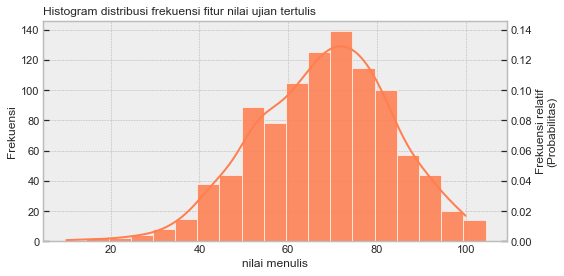

In [10]:
# histogram visualization skor menulis
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai menulis'], binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             ec="w", color="coral", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai menulis'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min() - 0.5, 
                       data_siswa['nilai menulis'].max() + 0.5), 
             kde=True ,ec="w", color="coral", ax=ax1)

ax.set_xlabel("nilai menulis", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi fitur nilai ujian tertulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

In [11]:
# statistik deskriptif kolom nilai ujian tertulis
print("nilai rata - rata dari ujian tertulis        : ", data_siswa['nilai menulis'].mean())
print("nilai tengah dari kolom ujian tertulis       : ", data_siswa['nilai menulis'].median())
print("nilai yang sering muncul dari nilai tertulis : ", data_siswa['nilai menulis'].mode())

nilai rata - rata dari ujian tertulis        :  68.054
nilai tengah dari kolom ujian tertulis       :  69.0
nilai yang sering muncul dari nilai tertulis :  0    74
dtype: int64


<ul>
  <li> 
      <h3>Insight</h3>
  </li>
    <p> 
     dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada 
     ujian tertulis sebesar 68.054
    </p>
    <p>
        nilai tengah dari keseluruhan dari ujian tertulis sebesar 69.0
    </p>
    <p>nilai yang sering muncul dari nilai ujian tertulis sebesar 0 dan 74</p>
</ul>

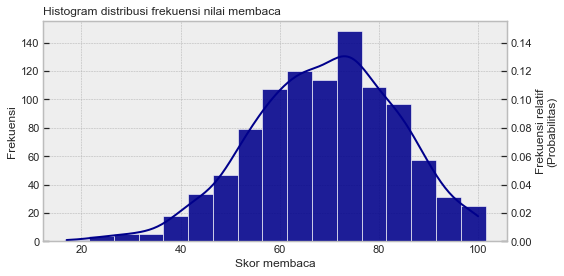

In [12]:
# histogram visualization skor membaca 
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai membaca'], binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             ec="w", color="#00008B", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai membaca'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min() - 0.5, 
                       data_siswa['nilai membaca'].max() + 0.5), kde=True ,
             ec="w", color="#00008B", ax=ax1)

ax.set_xlabel("Skor membaca", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi nilai membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

In [13]:
# statistik deskriptif kolom nilai membaca 
print("nilai rata - rata dari kolom ujian lisan sebesar        : ", data_siswa['nilai membaca'].mean())
print("nilai tengah dari kolom nilai ujian lisan sebesar       : ", data_siswa['nilai membaca'].median())
print("nilai yang sering muncul pada kolom ujian lisan sebesar : ", data_siswa['nilai membaca'].mode())

nilai rata - rata dari kolom ujian lisan sebesar        :  69.169
nilai tengah dari kolom nilai ujian lisan sebesar       :  70.0
nilai yang sering muncul pada kolom ujian lisan sebesar :  0    72
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        rata-rata siswa mendapatkan nilai ujian lisan sebesar 69.169
    <p>
</ul>

### Distribusi normal komulatif 

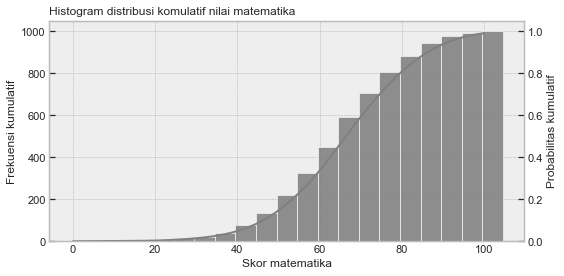

In [14]:
# Distribusi normal komulatif untuk fitur skor matematika 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai matematika'], binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min()-0.5, 
                       data_siswa['nilai matematika'].max()+0.5), 
             cumulative=True, ec="w", color="grey", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai matematika'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min()-0.5, 
                       data_siswa['nilai matematika'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="grey", ax=ax1)
# set label
ax.set_xlabel("Skor matematika", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif nilai matematika", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

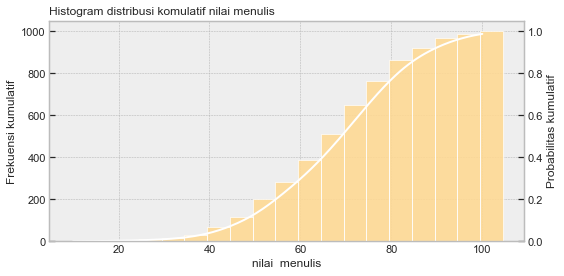

In [15]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai menulis'], binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             cumulative=True, ec="w", color="orange", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai menulis'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("nilai  menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif nilai menulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

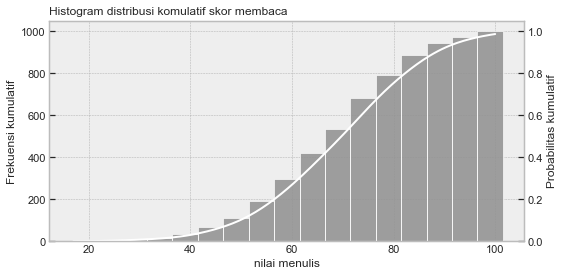

In [16]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['nilai membaca'], binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             cumulative=True, ec="w", color="black", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['nilai membaca'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("nilai menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif skor membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

### Probability density function(pdf) dan cumulative density function (cdf)

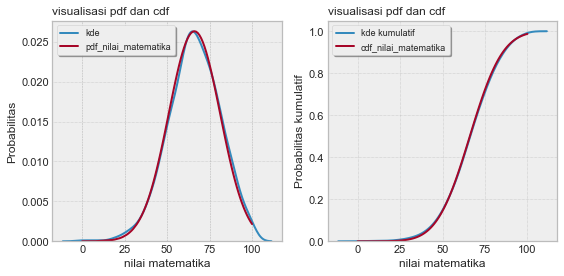

In [17]:
# membuat grafik pdf (probility density function) dan cdf (cumulative density function)
nilai_matematika_mean = data_siswa['nilai matematika'].mean() # buat variabel untuk menghitung nilai mean 
nilai_matematika_std  = data_siswa['nilai matematika'].std()  # buat variabel untuk menghtung nilai standar deviasi 

# perhitungan pdf untuk nilai matematika dengan library scipy 
pdf_nilai_matematika = norm.pdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)
# perthitungan cdf untuk nilai matematika dengan library scipy
cdf_nilai_matematika = norm.cdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)

# buat subplots untuk grafik pdf dan cdf
fig, axs = plt.subplots(1, 2,figsize=(8, 4))
# plot grafik untuk pdf 
sns.kdeplot(x =data_siswa['nilai matematika'], lw=2, ax=axs[0])
sns.lineplot(x= data_siswa['nilai matematika'], y = pdf_nilai_matematika, lw=2, ax=axs[0])

# plot grafik untuk cdf
sns.kdeplot (x = data_siswa['nilai matematika'], cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x = data_siswa['nilai matematika'], y = cdf_nilai_matematika, lw=2, ax=axs[1])

# buat legenda untuk informasi plot 1 dan 2 
axs[0].legend(["kde","pdf_nilai_matematika"], shadow = True ,fontsize=9, loc="upper left")
axs[1].legend(["kde kumulatif", "cdf_nilai_matematika"], shadow = True, fontsize=9)

# buat plot sumbu y pada plot 1
axs[0].set_ylabel("Probabilitas", fontsize=12)

# buat fungsi perulangan untuk sumbu x pada semua plot-
for ax in axs:
    ax.set_xlabel("nilai matematika", fontsize=12) # set font 12 pada sumbu x
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left")
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
        
ax.set_ylabel("Probabilitas kumulatif", fontsize=12) # set font 12 pada sumbu y

# tampilkan hasil visualisasi 
plt.tight_layout()
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

<ul>
    <li>
        <h3>Insights</h3>
    </li>
    <p> berdasarkan grafik probabilitas pada nilai matematika sama dengan grafik kernel density elemantery (kde)</p>  
</ul>

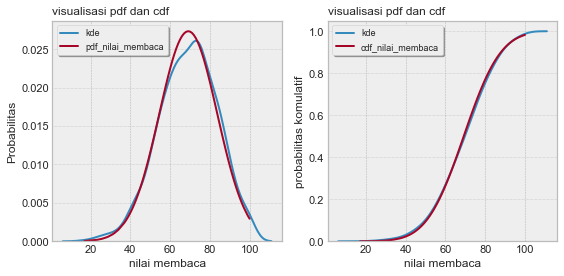

In [18]:
# membuat grafik untuk visualisasi pdf dan cdf kolom nilai membaca 
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# tentukan nilai mean dan standar deviasi untuk kolom nilai 
nilai_membaca_mean = data_siswa['nilai membaca'].mean() # code mean dari kolom membaca 
nilai_membaca_std  = data_siswa['nilai membaca'].std()  # code std dari kolom membaca 

# tentukan nilai norm pdf dan cdf untuk kolom nilai membaca 
pdf_nilai_membaca = norm.pdf(data_siswa['nilai membaca'], loc=nilai_membaca_mean, scale=nilai_membaca_std) # pdf code
cdf_nilai_membaca = norm.cdf(data_siswa['nilai membaca'], loc=nilai_membaca_mean, scale=nilai_membaca_std) # cdf code

# buat subplots 1 untuk visualisasi lineplot dan kdeplot
sns.kdeplot(x = data_siswa['nilai membaca'], lw=2, ax=axs[0]) # sub plot 1 untuk visualisasi kdeplot
sns.lineplot(x= data_siswa['nilai membaca'], y=pdf_nilai_membaca, lw=2, ax=axs[0]) # sub plot 1 untuk visualisasi lineplot

# buat subplots 2 untuk visualisasi lineplot dan kdeplot
sns.kdeplot (x = data_siswa['nilai membaca'], cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x = data_siswa['nilai membaca'], y = cdf_nilai_membaca, lw=2, ax=axs[1])

# set sumbu y untuk plot 1
axs[0].set_ylabel("Probabilitas", fontsize=12)
# buat perulangan untuk set sumbu xlabel di plot 1 dan plot 2
for ax in axs:
    ax.set_xlabel("nilai membaca", fontsize=12)
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left" )
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
    
# set sumbu y untuk plot 2
axs[1].set_ylabel("probabilitas komulatif", fontsize=12)

# set legenda untuk plot 1 dan 2
axs[0].legend(["kde","pdf_nilai_membaca"], shadow=True, fontsize=9, loc="upper left") # plot 1
axs[1].legend(["kde","cdf_nilai_membaca"], shadow=True, fontsize=9, loc="best")       # plot 2

# tampilkan visualisasi
plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insights</h3>
    </li>
    <p> berdasarkan grafik probabilitas pada kolom nilai membaca hampir mendekati grafik kernel density elemantery (kde)</p>  
</ul>

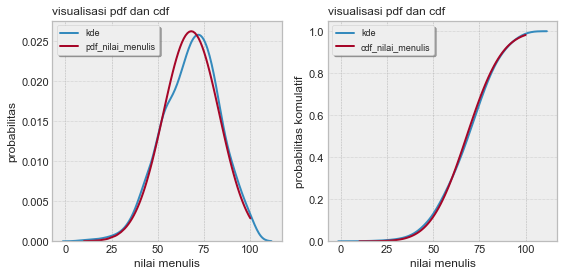

In [19]:
# membuat grafik untuk visualisasi pdf dan kde 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# menghitung nilai mean dan std dari kolom nilai menulis 
nilai_menulis_mean = data_siswa['nilai menulis'].mean() # code untuk menghitung nilai mean
nilai_menulis_std  = data_siswa['nilai menulis'].std()  # code untuk menghitung nilai std

# menghitung nilai norm untuk pdf dan cdf
pdf_nilai_menulis = norm.pdf(data_siswa['nilai menulis'], loc=nilai_menulis_mean, scale=nilai_menulis_std) # code untuk pdf 
cdf_nilai_menulis = norm.cdf(data_siswa['nilai menulis'], loc=nilai_menulis_mean, scale=nilai_menulis_std) # code untuk cdf

# visualisasikan kde dan line plot untuk sumbu 1 dan sumbu 2
sns.kdeplot ( x = data_siswa['nilai menulis'], lw = 2, ax=axs[0])                        # pdf plot sumbu 1
sns.lineplot( x = data_siswa['nilai menulis'], y  = pdf_nilai_menulis, lw=2, ax=axs[0])  # cdf plot sumbu 1
sns.kdeplot ( x = data_siswa['nilai menulis'], cumulative = True,     lw = 2, ax=axs[1]) # pdf komulatif sumbu 2
sns.lineplot( x = data_siswa['nilai menulis'], y = cdf_nilai_menulis, lw = 2, ax=axs[1]) # cdf plot sumbu 2

# buat legenda untuk sumbu plot 1 dan 2
axs[0].legend(["kde","pdf_nilai_menulis"], shadow=True, fontsize=9, loc="upper left") # plot 1
axs[1].legend(["kde","cdf_nilai_menulis"], shadow=True, fontsize=9, loc="best")       # plot 2

# set sumbu y untuk plot 1 dan 2
axs[0].set_ylabel("probabilitas", fontsize = 12)          # plot 1
axs[1].set_ylabel("probabilitas komulatif",fontsize = 12) # plot 2

# buat perulangan untuk sumbu x plot 1 dan 2
for ax in axs:
    ax.set_xlabel("nilai menulis", fontsize = 12)
    ax.set_title("visualisasi pdf dan cdf", fontsize = 12, loc="left" )
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)

# tampilkan hasil visualisasi 
plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insights</h3>
    </li>
    <p> berdasarkan grafik probabilitas pada nilai menulis hampir mendekati grafik kernel density elemantery (kde)</p>  
</ul>

# Deteksi Nilai Outliers

In [20]:
# buat fungsi untuk menghitung jumlah nilai outlier pada setiap kolom
def detect_outliers(data, x):
    Q1 = data_siswa[x].describe()['25%']
    Q3 = data_siswa[x].describe()['75%']
    IQR = Q3-Q1
    return data_siswa[(data_siswa[x] < Q1-1.5*IQR) | (data_siswa[x] > Q3+1.5*IQR)]

## Deteksi Nilai Outliers untuk data numerik

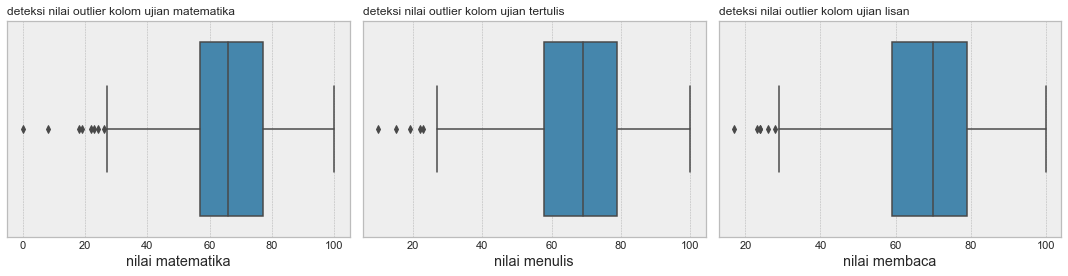

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.set_theme(style="white", palette=None)
sns.boxplot(x = data_siswa['nilai matematika'], ax=axs[0])
#sns.swarmplot(x = data_siswa['nilai matematika'],color="Chartreuse", ax=axs[0])

sns.boxplot(x = data_siswa['nilai menulis'], ax=axs[1])
sns.boxplot(x = data_siswa['nilai membaca'], ax=axs[2])

axs[0].set_title("deteksi nilai outlier kolom ujian matematika", loc="left", fontsize=12)
axs[1].set_title("deteksi nilai outlier kolom ujian tertulis",   loc="left", fontsize=12)
axs[2].set_title("deteksi nilai outlier kolom ujian lisan",      loc="left", fontsize=12)

# axs[0].set_xlabel("Nilai Matematika", fontsize=20, fontweight="bold", fontstyle="normal")
# axs[1].set_xlabel("Nilai Menulis",    fontsize=20, fontweight="bold", fontstyle="normal")
# axs[2].set_xlabel("Nilai Membaca",    fontsize=20, fontweight="bold", fontstyle="normal")

plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p>dari visualisasi boxplot tersebut : </p>
    <p> 
        1.) jumlah data pada kolom nilai matematika sampai dengan 
            kolom nilai menulis memiliki nilai outlier pada bagian nilai minimum
    <p> 
        2.) nilai mean pada setiap kolom tidak terlalu jauh dikisaran angka 60
    </p>
</ul> 

In [22]:
# total nilai yang mengalami outliers
print(detect_outliers(data_siswa,'nilai matematika').count() 
      + detect_outliers(data_siswa,'nilai membaca').count() 
      + detect_outliers(data_siswa,'nilai menulis').count())

jenis kelamin         19
kelompok              19
tingkat pendidikan    19
level                 19
persiapan tes         19
nilai matematika      19
nilai membaca         19
nilai menulis         19
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        1.) Total data yang memiliki nilai outlier pada setiap kolom berjumlah 19 data 
        dengan menjumlahkan kolom data nilai matematika dan nilai menulis 
    </p>
</ul> 

### Handling Outliers With IQR Using Swarmplot and boxplot analysis

In [23]:
# nilai outlier untuk fitur nilai matematika
Q1 = data_siswa['nilai matematika'].quantile(0.25)
Q3 = data_siswa['nilai matematika'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
# data_siswa['nilai matematika'].fillna(data_siswa['nilai matematika'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data_siswa = data_siswa[~((data_siswa['nilai matematika'] < (Q1 - 1.5 * IQR )) | (data_siswa['nilai matematika'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 20.0



<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        1.) Nilai IQR untuk kolom matematika sebesar 20.0
    </p>
</ul> 

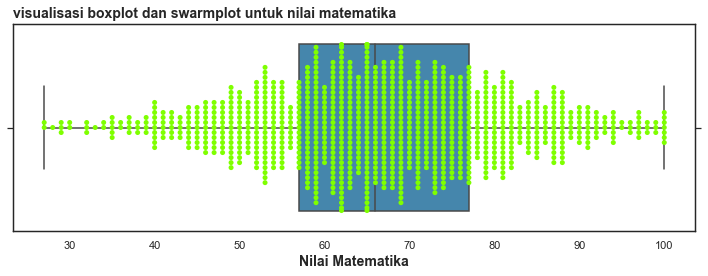

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = data_siswa['nilai matematika'], ax=ax)

ax1 = ax.twinx()
sns.swarmplot(data=data_siswa, x="nilai matematika", color="Chartreuse", ax=ax1)

ax.set_xlabel("Nilai Matematika", fontsize=14,  fontweight="bold", fontstyle="normal")
ax.set_title("visualisasi boxplot dan swarmplot untuk nilai matematika", 
             fontsize=14, fontstyle="normal", fontweight="bold", loc="left")
plt.tight_layout()
plt.show()

<p>terlihat bahwa pada grafik boxplot dan swarmplot tidak lagi mengalami nilai outlier</p>

In [25]:
# nilai outlier untuk fitur nilai menulis
Q1 = data_siswa['nilai menulis'].quantile(0.25)
Q3 = data_siswa['nilai menulis'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data_siswa['nilai menulis'].fillna(data_siswa['nilai menulis'].value_counts().idxmax(), inplace =True)

# preprocesing missing outliers
data_siswa = data_siswa[~((data_siswa['nilai menulis'] < (Q1 - 1.5 * IQR )) | (data_siswa['nilai menulis'] > (Q3 + 1.5 * IQR)))]

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

Nilai IQR dari Datasheet tersebut adalah : 21.0



<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        1.) Nilai IQR untuk kolom menulis sebesar 21.0
    </p>
</ul> 

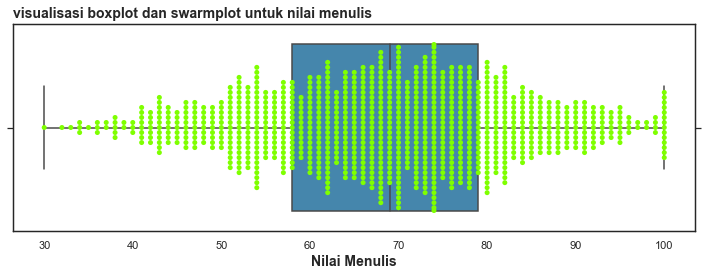

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = data_siswa['nilai menulis'], ax=ax)

ax1 = ax.twinx()
sns.swarmplot(data=data_siswa, x="nilai menulis", color="Chartreuse", ax=ax1)

ax.set_xlabel("Nilai Menulis", fontsize=14,  fontweight="bold", fontstyle="normal")
ax.set_title("visualisasi boxplot dan swarmplot untuk nilai menulis", 
             fontsize=14, fontstyle="normal", fontweight="bold", loc="left")
plt.tight_layout()
plt.show()

<p>terlihat bahwa pada grafik boxplot dan swarmplot tidak lagi mengalami nilai outlier</p>

In [29]:
# nilai outlier untuk fitur nilai membaca
Q1 = data_siswa['nilai membaca'].quantile(0.25)
Q3 = data_siswa['nilai membaca'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data_siswa['nilai membaca'].fillna(data_siswa['nilai membaca'].value_counts().idxmax(), inplace =True)

# preprocesing missing outliers
data_siswa = data_siswa[~((data_siswa['nilai membaca'] < (Q1 - 1.5 * IQR )) | (data_siswa['nilai membaca'] > (Q3 + 1.5 * IQR)))]

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

Nilai IQR dari Datasheet tersebut adalah : 20.0



<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
        1.) Nilai IQR untuk kolom nilai membaca sebesar 20.0
    </p>
</ul> 

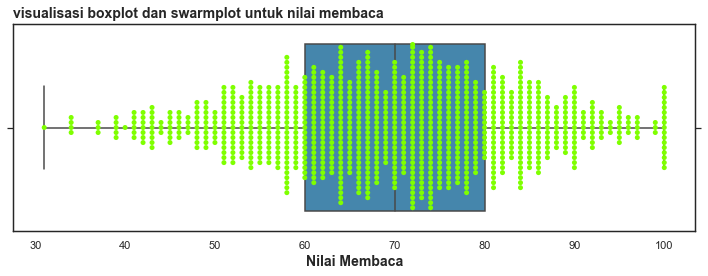

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = data_siswa['nilai membaca'], ax=ax)

ax1 = ax.twinx()
sns.swarmplot(data=data_siswa, x="nilai membaca", color="Chartreuse", ax=ax1)

ax.set_xlabel("Nilai Membaca", fontsize=14,  fontweight="bold", fontstyle="normal")
ax.set_title("visualisasi boxplot dan swarmplot untuk nilai membaca", 
             fontsize=14, fontstyle="normal", fontweight="bold", loc="left")
plt.tight_layout()
plt.show()

<p>terlihat bahwa pada grafik boxplot dan swarmplot tidak lagi mengalami nilai outlier</p>

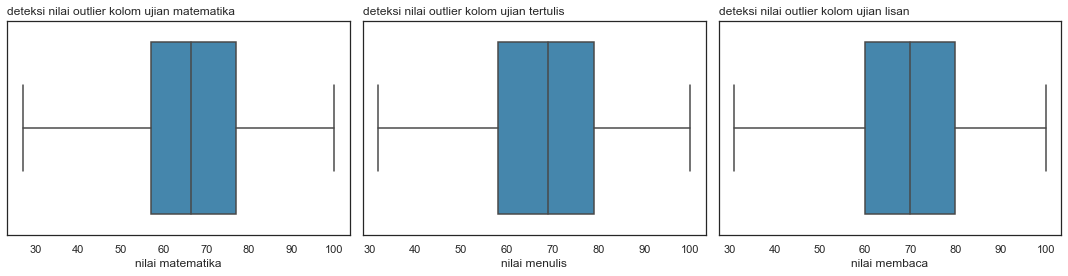

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.set_theme(style="white", palette=None)
sns.boxplot(x = data_siswa['nilai matematika'], ax=axs[0])
#sns.swarmplot(x = data_siswa['nilai matematika'],color="Chartreuse", ax=axs[0])

sns.boxplot(x = data_siswa['nilai menulis'], ax=axs[1])
sns.boxplot(x = data_siswa['nilai membaca'], ax=axs[2])

axs[0].set_title("deteksi nilai outlier kolom ujian matematika", loc="left", fontsize=12)
axs[1].set_title("deteksi nilai outlier kolom ujian tertulis",   loc="left", fontsize=12)
axs[2].set_title("deteksi nilai outlier kolom ujian lisan",      loc="left", fontsize=12)

# axs[0].set_xlabel("Nilai Matematika", fontsize=20, fontweight="bold", fontstyle="normal")
# axs[1].set_xlabel("Nilai Menulis",    fontsize=20, fontweight="bold", fontstyle="normal")
# axs[2].set_xlabel("Nilai Membaca",    fontsize=20, fontweight="bold", fontstyle="normal")

plt.tight_layout()
plt.show()

# Analisis Bivariat, Multivariat

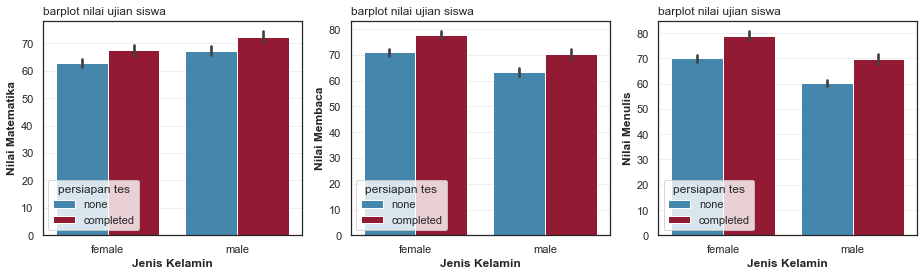

In [32]:
# buat subplots menjadi 3 bagian  
fig, axs = plt.subplots(1, 3, figsize=(13,4))

# visualisasi data jenis kelamin dan nilai matematika 
sns.set_theme(style="white", palette=None)
sns.barplot(x="jenis kelamin", y="nilai matematika", hue="persiapan tes", data=data_siswa, ax=axs[0]) # plot 1
sns.barplot(x="jenis kelamin", y="nilai membaca"   , hue="persiapan tes", data=data_siswa, ax=axs[1]) # plot 2
sns.barplot(x="jenis kelamin", y="nilai menulis"   , hue="persiapan tes", data=data_siswa, ax=axs[2]) # plot 3

# buat perulangan untuk plot ax x label dari 3 bagian visualisasi
for ax in axs:
    ax.set_xlabel("Jenis Kelamin", fontsize=12, fontstyle="normal", fontweight="bold")
    ax.set_title("barplot nilai ujian siswa", fontsize=12, loc="left")
    ax.grid(axis="y", color='darkgray', linestyle=':', linewidth=0.5)
    
# set y label untuk plot 1 sampai plot 3
axs[0].set_ylabel("Nilai Matematika", fontsize = 12, fontstyle="normal", fontweight="bold")
axs[1].set_ylabel("Nilai Membaca",    fontsize = 12, fontstyle="normal", fontweight="bold")
axs[2].set_ylabel("Nilai Menulis",    fontsize = 12, fontstyle="normal", fontweight="bold")

# tampilkan visualisasi 
plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
        <p> berdasarkan hasil visualisasi berikut siswa laki-laki memiliki nilai yang unggul 70 % pada ujian matematika dan 60% sisanya adalah perempuan<p>
        <p> sedangkan siswa perempuan unggul dalan ujian lisan dan ujian tertulis dengan 70 % dibandingkan dengan siswa laki-laki</p>
    </li> 
</ul>

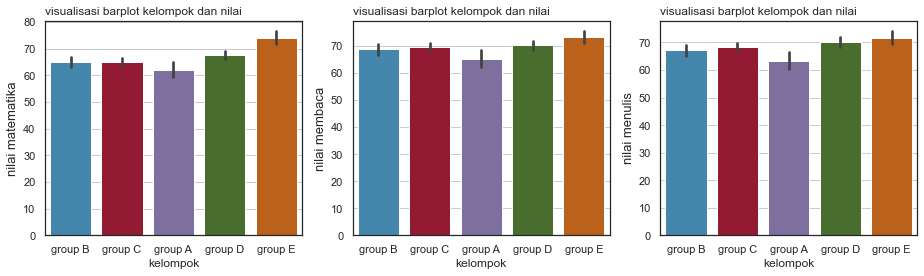

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(13,4))
sns.color_palette("pastel")
sns.barplot(x = "kelompok", y = "nilai matematika", data = data_siswa, ax=axs[0])
sns.barplot(x = "kelompok", y = "nilai membaca",    data = data_siswa, ax=axs[1])
sns.barplot(x = "kelompok", y = "nilai menulis",    data = data_siswa, ax=axs[2])

for ax in axs:
    ax.set_xlabel("kelompok",fontsize=12, fontstyle="normal")
    ax.set_title("visualisasi barplot kelompok dan nilai", fontsize=12, loc="left")
    ax.grid(axis="y")
    
axs[0].set_ylabel("nilai matematika", fontsize=13, fontstyle="normal")
axs[1].set_ylabel("nilai membaca",    fontsize=13, fontstyle="normal")
axs[2].set_ylabel("nilai menulis",    fontsize=13, fontstyle="normal")

plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
        <p>pada visualisasi diatas Grup E memiliki nilai tertinggi untuk ujian matematika dan nilai tertulis dengan nilai matematika 80 % dan ujian lisan dan ujian tulis sebesar 70% </p>
        <p>disusul dengan grup D yang memiiki nila tertinggi kedua dengan rentang nilai 70 % untuk ujian tulis dan lisan dan 65 % untuk nilai matematika 
    </li>
</ul>

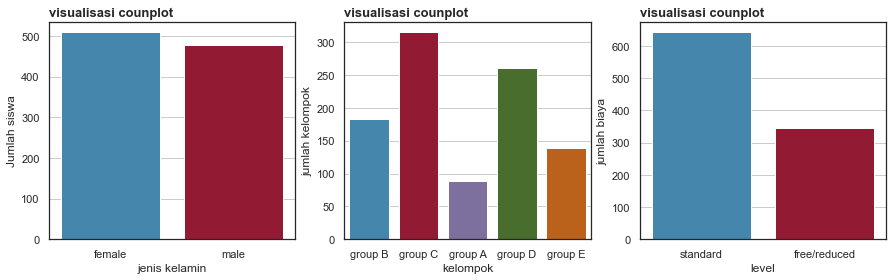

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x = 'jenis kelamin', data = data_siswa, ax=axs[0])
sns.countplot(x = 'kelompok', data = data_siswa, ax=axs[1])
sns.countplot(x = 'level', data = data_siswa, ax=axs[2])

axs[0].set_ylabel("Jumlah siswa", fontsize=12)    # y label plot 1
axs[1].set_ylabel("jumlah kelompok", fontsize=12) # y label plot 2
axs[2].set_ylabel("jumlah biaya", fontsize=12)    # y label plot 3

for ax in axs:
    ax.set_title("visualisasi counplot", fontsize=13, fontweight="bold", loc="left")
    ax.grid(axis="y")
    
plt.show()

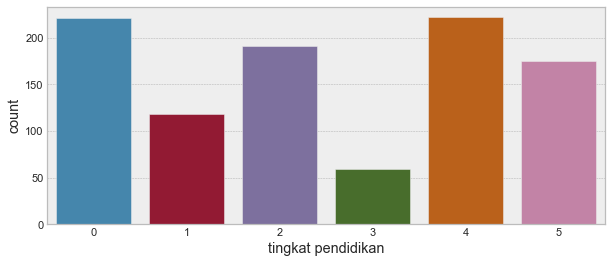

In [86]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'tingkat pendidikan',data = data_siswa)
plt.show()

## Analisa Multivariat dengan Pivot table

In [36]:
result = pd.pivot_table(data = data_siswa, index='kelompok', columns='persiapan tes', values='nilai matematika')
print(result)

persiapan tes  completed       none
kelompok                           
group A        68.258065  58.614035
group B        67.850746  63.379310
group C        67.495726  63.540404
group D        69.792683  66.480447
group E        77.433333  71.632911


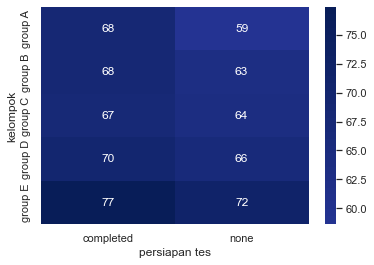

In [37]:
sns.heatmap(result, annot=True, cmap="YlGnBu", center=0.177)
plt.show()

In [38]:
result1 = pd.pivot_table(data = data_siswa, index='kelompok', columns='persiapan tes', values='nilai membaca')
print(result1)

persiapan tes  completed       none
kelompok                           
group A        71.032258  61.947368
group B        73.283582  66.017241
group C        73.658120  67.237374
group D        74.146341  68.363128
group E        76.666667  70.860759


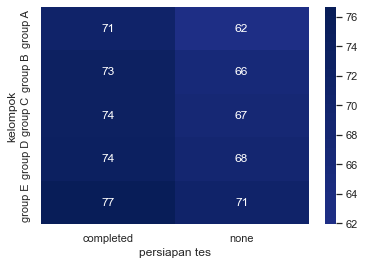

In [39]:
sns.heatmap(result1, annot=True, cmap="YlGnBu", center=0.177)
plt.show()

In [40]:
result2 = pd.pivot_table(data = data_siswa, index='kelompok', columns='persiapan tes', values='nilai menulis')
print(result2)

persiapan tes  completed       none
kelompok                           
group A        70.903226  58.964912
group B        72.417910  64.000000
group C        74.452991  64.777778
group D        76.658537  67.340782
group E        75.983333  68.556962


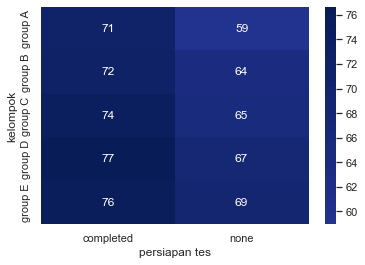

In [41]:
sns.heatmap(result2, annot=True, cmap="YlGnBu", center=0.177)
plt.show()

In [42]:
data_siswa.describe().T

,count,mean,std,min,25%,50%,75%,max
nilai matematika,986.0,66.694726,14.340780,27.0,57.0,66.5,77.0,100.0
nilai membaca,986.0,69.723124,13.910716,31.0,60.0,70.0,80.0,100.0
nilai menulis,986.0,68.648073,14.427092,32.0,58.0,69.0,79.0,100.0


## mencari Korelasi antara sumbu x dan y pada data siswa

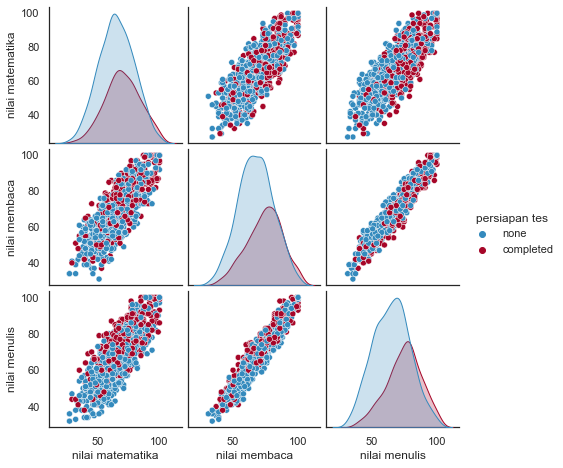

In [43]:
sns.pairplot(data_siswa,  hue="persiapan tes", diag_kind="kde",height=2.2)

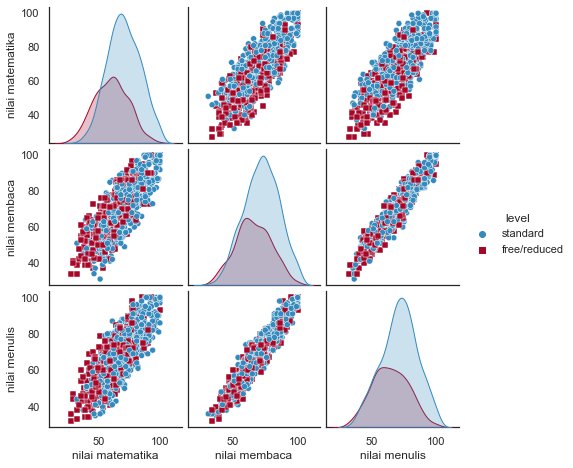

In [44]:
sns.pairplot(data_siswa, hue="level", diag_kind="auto", markers=["o", "s"], height=2.2)
#sns.pairplot(data_siswa, hue="level",corner=True)

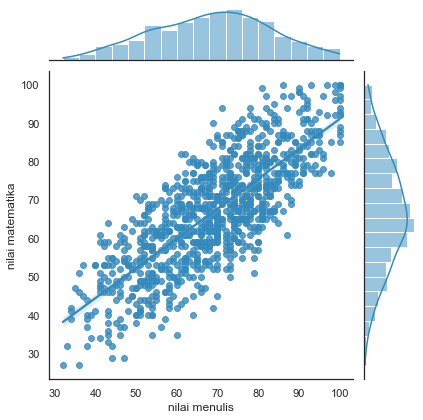

In [45]:
sns.jointplot(data=data_siswa, x=data_siswa['nilai menulis'], y= data_siswa['nilai matematika'], kind="reg")

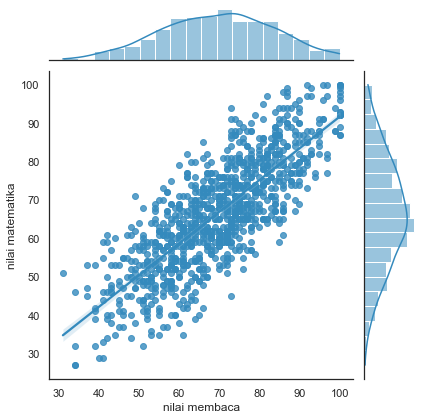

In [46]:
sns.jointplot(data=data_siswa, x="nilai membaca", y="nilai matematika", kind="reg")

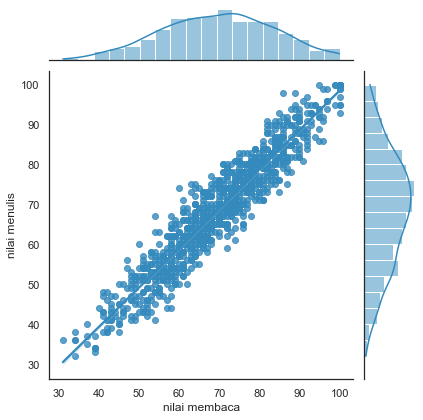

In [47]:
sns.jointplot(data=data_siswa, x='nilai membaca', y='nilai menulis', kind='reg')

,nilai matematika,nilai membaca,nilai menulis
nilai matematika,1.000000,0.795697,0.768802
nilai membaca,0.795697,1.000000,0.946764
nilai menulis,0.768802,0.946764,1.000000


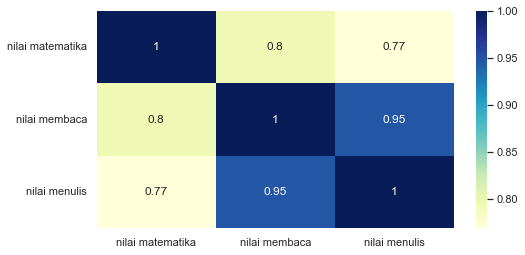

In [48]:
plt.figure(figsize=(8, 4))
data = data_siswa.corr("spearman")
sns.heatmap(data, cmap="YlGnBu", annot=True)
data

,nilai matematika,nilai membaca,nilai menulis
nilai matematika,1.000000,0.606899,0.579580
nilai membaca,0.606899,1.000000,0.815129
nilai menulis,0.579580,0.815129,1.000000


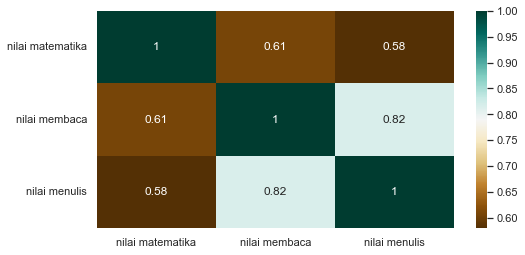

In [49]:
plt.figure(figsize=(8, 4))
data = data_siswa.corr("kendall")
sns.heatmap(data, cmap="BrBG", annot=True)
data

,nilai matematika,nilai membaca,nilai menulis
nilai matematika,1.000000,0.798881,0.780668
nilai membaca,0.798881,1.000000,0.949844
nilai menulis,0.780668,0.949844,1.000000


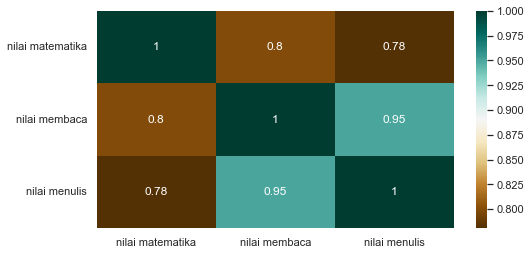

In [50]:
plt.figure(figsize=(8, 4))
data = data_siswa.corr("pearson")
sns.heatmap(data, cmap="BrBG", annot=True)
data

In [51]:
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Feature Engineering 

## Label Encoder

In [52]:
category = ['jenis kelamin','kelompok', 'tingkat pendidikan','level','persiapan tes']

label = LabelEncoder()
data_siswa[category] = data_siswa[category].apply(label.fit_transform)

In [53]:
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


## Teknik Seleksi Fitur (Chi Square)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_siswa.iloc[:, 0:7]
y = data_siswa.iloc[:, -1]

bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X, y)

dfscores  = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['fitur','score']

print(featureScores.nlargest(7, 'score'))

                fitur        score
6       nilai membaca  2485.219406
5    nilai matematika  1931.140130
2  tingkat pendidikan    90.917909
0       jenis kelamin    80.958798
1            kelompok    59.458810
4       persiapan tes    52.952500
3               level    37.560747


# Model Machine Learning 

## Multiple Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

X = data_siswa.iloc[:, :-1].values
y = data_siswa.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state = 5)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(10)

,Actual,Predicted
0,52,49.580485
1,75,65.365510
2,73,75.628162
3,86,82.557352
4,69,62.897661
5,41,53.124909
6,59,58.285148
7,72,77.559914
8,46,51.089336
9,100,100.589574


### Validasi model (croos validation)

In [93]:
from sklearn.model_selection import KFold, cross_val_score

clf = LinearRegression()
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.94069659 0.92286141 0.93811788 0.93467838 0.92546543]
Average CV Score:  0.9323639349102326
Number of CV Scores used in Average:  5


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X = data_siswa.iloc[:, :-1]
y = data_siswa.iloc[:, 7]

def create_model():
    model =Sequential()
    model.add(Dense(12, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### Akurasi (MAE, MSE, RMSE)

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.1181250369366365
Mean Squared Error: 15.004079035231594
Root Mean Squared Error: 3.8735099115958893
Model R^2 Square value 0.9301513959024622


## Pengujian Hipotesis ANOVA 

In [82]:
X_new = sm.add_constant(X)
X_opt = X_new.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          nilai menulis   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1974.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:44:39   Log-Likelihood:                -2691.1
No. Observations:                 986   AIC:                             5398.
Df Residuals:                     978   BIC:                             5437.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.5014      0.798     10.651      0.000       6.935      10.068
jenis kelamin         -5.7805      0.332    -17.410      0.000      -6.432      -5.129
kelompok               0.0922      0.106      0.872      0.384      -0.115       0.300
tingkat pendidikan    -0.1516      0.065     -2.332      0.020      -0.279      -0.024
level                  0.1330      0.270      0.493      0.622      -0.397       0.663
persiapan tes         -3.4273      0.256    -13.377      0.000      -3.930      -2.925
nilai matematika       0.2725      0.020     13.929      0.000       0.234       0.311
nilai membaca          0.6748      0.020     33.828      0.000       0.636       0.714
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.931
Skew:                           0.064   Prob(JB):                        0.140
Kurtosis:                       2.718   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""